In [1]:
%cd ..

/home/anatoly/Private/GitHub/renokan/study_ds/WeatherAUS-5


## Feature analysis

### Importing the modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# FutureWarning: is_categorical is deprecated and will be removed
# in a future version.  Use is_categorical_dtype instead

%matplotlib inline

In [3]:
%lf data/

-rw-rw-r-- 1 anatoly 12807959 июл 27 23:56 actual_data.csv
-rw-rw-r-- 1 anatoly  2793277 июл 27 23:56 future_data.csv
-rw-rw-r-- 1 anatoly    35935 авг  1 01:50 split_dataset.ipynb
-rw-rw-r-- 1 anatoly 14094055 дек 11  2020 weatherAUS.csv


In [4]:
df = pd.read_csv("data/actual_data.csv")
df.shape

(118903, 23)

In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118903 entries, 0 to 118902
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           118903 non-null  object 
 1   Location       118903 non-null  object 
 2   MinTemp        117751 non-null  float64
 3   MaxTemp        117958 non-null  float64
 4   Rainfall       116219 non-null  float64
 5   Evaporation    71726 non-null   float64
 6   Sunshine       67454 non-null   float64
 7   WindGustDir    110213 non-null  object 
 8   WindGustSpeed  110276 non-null  float64
 9   WindDir9am     109976 non-null  object 
 10  WindDir3pm     115971 non-null  object 
 11  WindSpeed9am   117319 non-null  float64
 12  WindSpeed3pm   117027 non-null  float64
 13  Humidity9am    116719 non-null  float64
 14  Humidity3pm    116355 non-null  float64
 15  Pressure9am    106707 non-null  float64
 16  Pressure3pm    106745 non-null  float64
 17  Cloud9am       74693 non-null

In [6]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


## Checking for duplicates and missing values in rows

In [7]:
df.duplicated(['Date', 'Location']).sum()

0

In [8]:
fullness = df.notna().sum(axis=1)
fullness.value_counts(sort=False)[:7]

20     7004
19    21646
21    14496
16     1953
15      797
18     3130
17     8365
dtype: int64

In [9]:
check = df.loc[fullness < 5]
check.groupby('Location').size()

Location
Albury            3
BadgerysCreek     6
CoffsHarbour     12
Dartmoor         63
MountGinini      24
Newcastle        57
Nhil              5
NorahHead        15
PearceRAAF        1
Penrith           5
Richmond          4
SalmonGums       29
Uluru             1
Walpole          23
Wollongong        3
dtype: int64

In [10]:
check.count()

Date             251
Location         251
MinTemp            4
MaxTemp           21
Rainfall           5
Evaporation       64
Sunshine          64
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        3
Pressure9am        3
Pressure3pm        3
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            3
RainToday          5
RainTomorrow      15
dtype: int64

## Checking for missing values in columns

In [11]:
isna_stat = df.isna().mean().mul(100).round(3)
isna_stat.map("{} %".format)

Date                0.0 %
Location            0.0 %
MinTemp           0.969 %
MaxTemp           0.795 %
Rainfall          2.257 %
Evaporation      39.677 %
Sunshine          43.27 %
WindGustDir       7.308 %
WindGustSpeed     7.255 %
WindDir9am        7.508 %
WindDir3pm        2.466 %
WindSpeed9am      1.332 %
WindSpeed3pm      1.578 %
Humidity9am       1.837 %
Humidity3pm       2.143 %
Pressure9am      10.257 %
Pressure3pm      10.225 %
Cloud9am         37.182 %
Cloud3pm         38.399 %
Temp9am           1.268 %
Temp3pm            1.54 %
RainToday         2.257 %
RainTomorrow      2.257 %
dtype: object

In [12]:
big_isna = isna_stat[isna_stat > 35].index.tolist()

In [13]:
df[big_isna].describe()

,Evaporation,Sunshine,Cloud9am,Cloud3pm
count,71726.000000,67454.000000,74693.000000,73245.000000
mean,5.360139,7.605868,4.343285,4.434801
std,4.043464,3.785760,2.876682,2.704868
min,0.000000,0.000000,0.000000,0.000000
25%,2.600000,4.800000,1.000000,2.000000
50%,4.600000,8.400000,5.000000,5.000000
75%,7.200000,10.600000,7.000000,7.000000
max,82.400000,14.500000,9.000000,9.000000


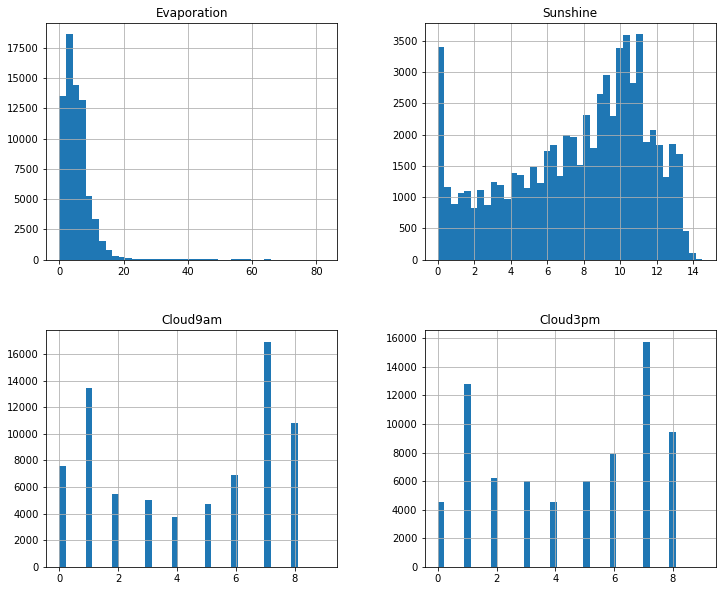

In [14]:
df[big_isna].hist(bins=40, figsize=(12, 10))
plt.show()

In [15]:
df[big_isna].groupby(df['Location']).count()

,Evaporation,Sunshine,Cloud9am,Cloud3pm
Location,,,,
Adelaide,1704,1769,0,0
Albany,2453,2429,2484,2329
Albury,0,0,1045,1145
AliceSprings,2464,2419,2462,2395
BadgerysCreek,0,0,0,0
Ballarat,0,0,2091,1601
Bendigo,1185,0,1798,1962
Brisbane,2639,2603,2650,2649
Cairns,2435,2460,2481,2470


## Checking the target column

In [16]:
target = df['RainTomorrow']

In [17]:
target.value_counts(dropna=False)

No     90288
Yes    25931
NaN     2684
Name: RainTomorrow, dtype: int64

In [18]:
target.value_counts(dropna=False,
                    normalize=True
            ).mul(100).round(2).map("{} %".format)

No     75.93 %
Yes    21.81 %
NaN     2.26 %
Name: RainTomorrow, dtype: object

In [19]:
target[target.isna()].groupby(df['Location']).size().sort_values()[::5]

Location
Townsville       1
Sale             4
Sydney           7
Albany           9
Albury          24
Wollongong      47
Newcastle       63
MountGinini    132
Melbourne      638
Name: RainTomorrow, dtype: int64

In [20]:
pd.crosstab(df['Location'], target,
                    normalize='index', margins=True
           ).mul(100).round(2).sort_values(by='Yes', ascending=False)

RainTomorrow,No,Yes
Location,,
Portland,63.49,36.51
Walpole,67.07,32.93
Dartmoor,68.50,31.50
Cairns,68.68,31.32
MountGambier,69.98,30.02
NorfolkIsland,70.03,29.97
CoffsHarbour,70.22,29.78
Albany,70.31,29.69
Witchcliffe,70.45,29.55


## Checking numerical features

In [21]:
num_columns = df.select_dtypes(include='number').columns.to_list()

In [22]:
num_features = [column for column in num_columns if column not in big_isna]

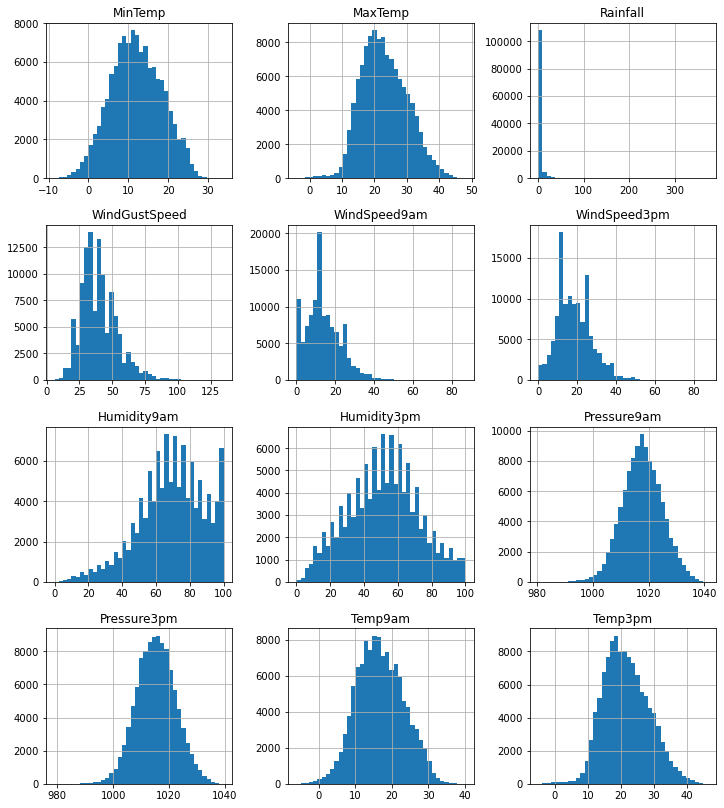

In [23]:
df[num_features].hist(bins=40, figsize=(12, 14))
plt.show()

In [24]:
num_features.remove('Rainfall')

In [25]:
print(num_features)

['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


## Checking categorial features

In [26]:
obj_columns = df.select_dtypes(include='object').columns.to_list()

In [27]:
obj_columns

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [28]:
cat_data = df[obj_columns].copy()

mapping = {'Yes': 1, 'No': 0}
cat_data['RainToday'] = cat_data['RainToday'].map(mapping)
cat_data['RainTomorrow'] = cat_data['RainTomorrow'].map(mapping)

cat_data['Date'] = pd.to_datetime(cat_data['Date']).dt.month_name()
cat_data['Date'] = ce.TargetEncoder().fit_transform(cat_data['Date'],
                                                    cat_data['RainTomorrow'])

cat_data['Location'] = ce.TargetEncoder().fit_transform(cat_data['Location'],
                                                        cat_data['RainTomorrow'])
winds = df.filter(like="Dir").columns
cat_data[winds] = ce.OrdinalEncoder().fit_transform(cat_data[winds])

cat_data

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,0.208453,0.206144,1,1,1,0.0,0.0
1,0.208453,0.206144,2,2,2,0.0,0.0
2,0.208453,0.206144,3,1,2,0.0,0.0
3,0.208453,0.206144,4,3,3,0.0,0.0
4,0.208453,0.206144,1,4,4,0.0,0.0
...,...,...,...,...,...,...,...
118898,0.208453,0.060729,16,13,3,0.0,0.0
118899,0.208453,0.060729,15,14,7,0.0,0.0
118900,0.208453,0.060729,16,14,12,0.0,0.0
118901,0.208453,0.060729,16,14,6,0.0,0.0


In [29]:
corr_matrix = cat_data.corr()

In [30]:
corr_spearman = cat_data.corr(method='spearman')

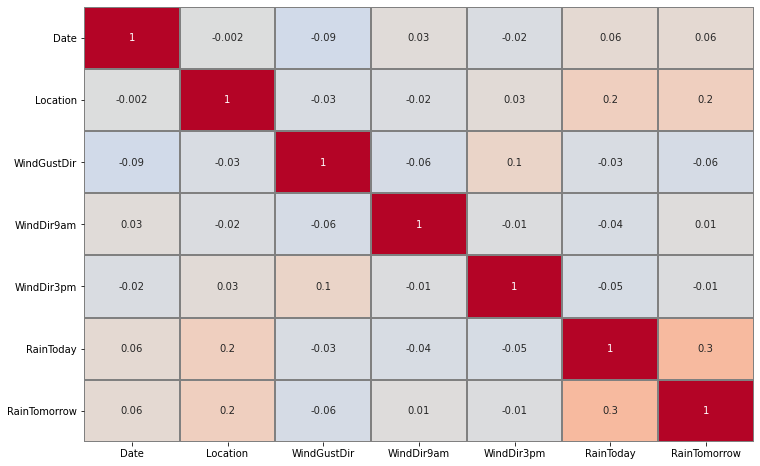

In [43]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True,
                vmin=-1, vmax=1, center=0, linewidths=1,
                cmap="coolwarm", fmt='.1g',
                linecolor='gray', cbar=False);

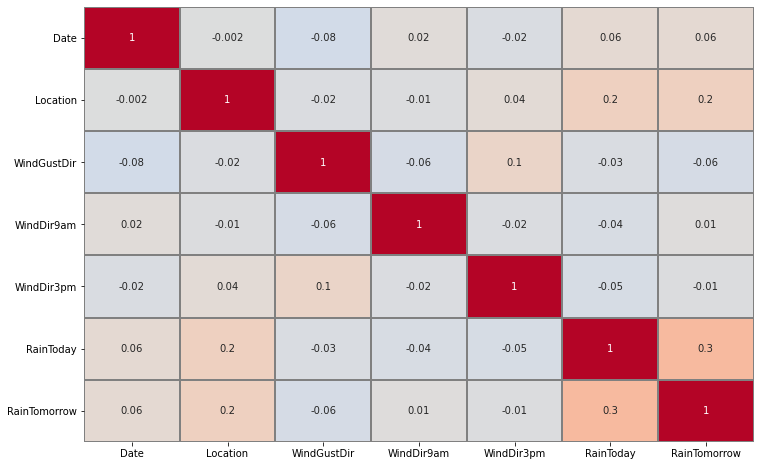

In [42]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_spearman, annot=True,
                vmin=-1, vmax=1, center=0, linewidths=1,
                cmap="coolwarm", fmt='.1g',
                linecolor='gray', cbar=False);

In [33]:
(df['WindGustDir'] == df['WindDir3pm']).value_counts()

False    84416
True     34487
dtype: int64

In [34]:
(df['WindGustDir'] == df['WindDir3pm'])

0         False
1         False
2          True
3         False
4         False
          ...  
118898     True
118899     True
118900    False
118901    False
118902    False
Length: 118903, dtype: bool

In [35]:
(df['WindGustDir'] == df['WindDir3pm']).map({True: 1, False: 0})

0         0
1         0
2         1
3         0
4         0
         ..
118898    1
118899    1
118900    0
118901    0
118902    0
Length: 118903, dtype: int64

In [36]:
(df['WindGustDir'] == df['WindDir3pm']).groupby(df['RainTomorrow']).count()

RainTomorrow
No     90288
Yes    25931
dtype: int64

In [37]:
mask_wind_dir = df['WindGustDir'] == df['WindDir3pm']
df['RainTomorrow'].loc[mask_wind_dir].value_counts()

No     26557
Yes     7373
Name: RainTomorrow, dtype: int64

In [38]:
df['RainTomorrow'].loc[~mask_wind_dir].value_counts()

No     63731
Yes    18558
Name: RainTomorrow, dtype: int64